In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile
import os
import pandas as pd

# Path to the ZIP file (assuming it's in the root directory of your Colab environment)
zip_path = '/content/360 Rocks.zip'

# Directory where you want to extract the contents of the zip
extract_to = '/content/images'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Listing the extracted images
image_files = [os.path.join(extract_to, f) for f in os.listdir(extract_to) if os.path.isfile(os.path.join(extract_to, f))]

# Creating a DataFrame with the paths of the images
df_images = pd.DataFrame(image_files, columns=['ImagePath'])

# Display the DataFrame
print(df_images.head())

# Now, df_images contains the paths to your images, which you can use for further processing.


                            ImagePath
0  /content/images/M_Quartzite_08.jpg
1  /content/images/I_Pegmatite_02.jpg
2      /content/images/S_Shale_06.jpg
3     /content/images/M_Marble_04.jpg
4  /content/images/M_Migmatite_11.jpg


Reading images in grayscale and resizing it

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load images from folder
folder_path='/content/images/'
image_files = os.listdir(folder_path)
images = []

# Read and preprocess images
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    resized_image = cv2.resize(image, (100, 100))  # Resize image if needed
    images.append(resized_image)




Examining the data

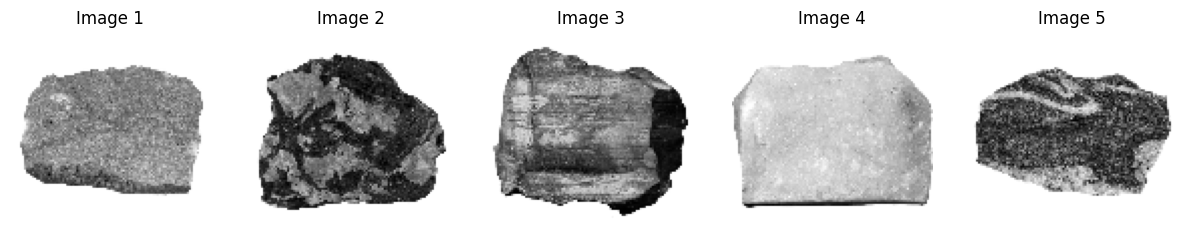

Shape of each image: (100, 100)
Data type of images: uint8
Mean intensity: 183.34740694444446
Standard deviation of intensity: 77.67027303732577
Minimum intensity: 0
Maximum intensity: 255


In [ ]:
# Step 2: Display sample images
num_sample_images = 5
sample_images = images[:num_sample_images]

plt.figure(figsize=(15, 5))
for i in range(num_sample_images):
    plt.subplot(1, num_sample_images, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show()

# Step 3: Check shape and data type
print("Shape of each image:", images[0].shape)
print("Data type of images:", images[0].dtype)

# Step 4: Calculate basic statistics
images_array = np.array(images)
mean_intensity = np.mean(images_array)
std_intensity = np.std(images_array)
min_intensity = np.min(images_array)
max_intensity = np.max(images_array)

print("Mean intensity:", mean_intensity)
print("Standard deviation of intensity:", std_intensity)
print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)


**1. Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 90% of the variance? [3 points]**

In [ ]:

from sklearn.decomposition import PCA



# Step 3: Flatten images into 1D arrays
flattened_images = [image.flatten() for image in images]

# Step 4: Perform PCA
pca = PCA()
pca.fit(flattened_images)

# Step 5: Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Step 6: Determine number of components needed for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

print("Number of components needed to preserve 90% of the variance:", n_components_90)


Number of components needed to preserve 90% of the variance: 149


149 components are needed to preserve 90% variance.

**2. Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA**





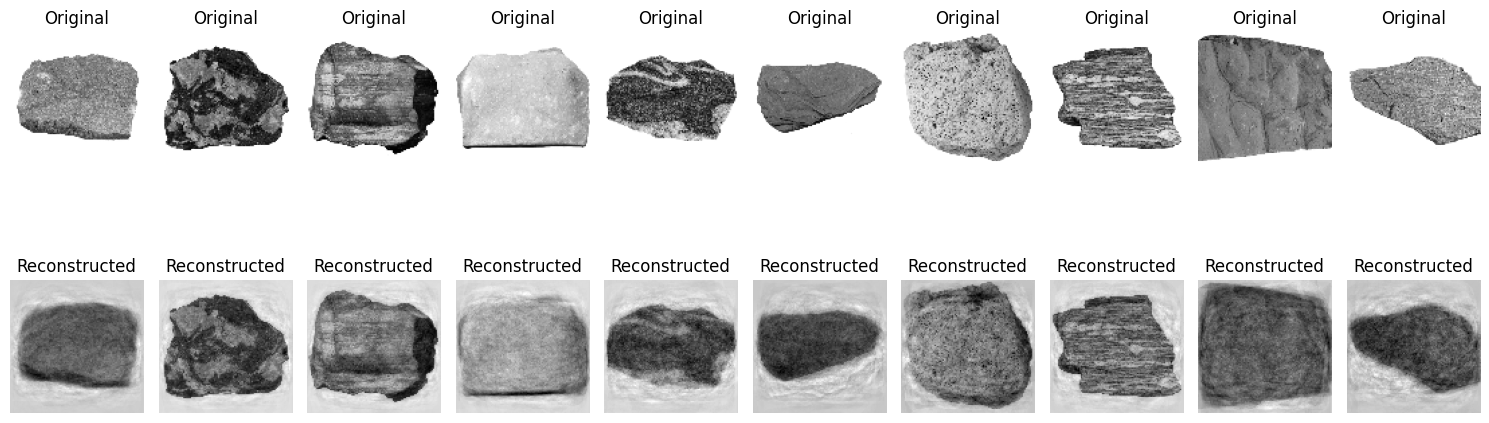

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Step 2: Display 10 original images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

# Step 3: Flatten images into 1D arrays
flattened_images = np.array([image.flatten() for image in images])

# Step 4: Apply PCA and keep 90% variance
pca = PCA(0.9)
pca.fit(flattened_images)

# Step 5: Reconstruct images and display
reconstructed_images = pca.inverse_transform(pca.transform(flattened_images))

for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(100, 100), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


##3. Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters.

## A) Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].

In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA


# Step 3: Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
pca.fit(flattened_images)

# Step 4: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance_ratio)

print("Variance explained with the first two principal components:", total_variance_explained)


Variance explained with the first two principal components: 0.3385824057768463


# 3) B) Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb Links to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS. [6 points]

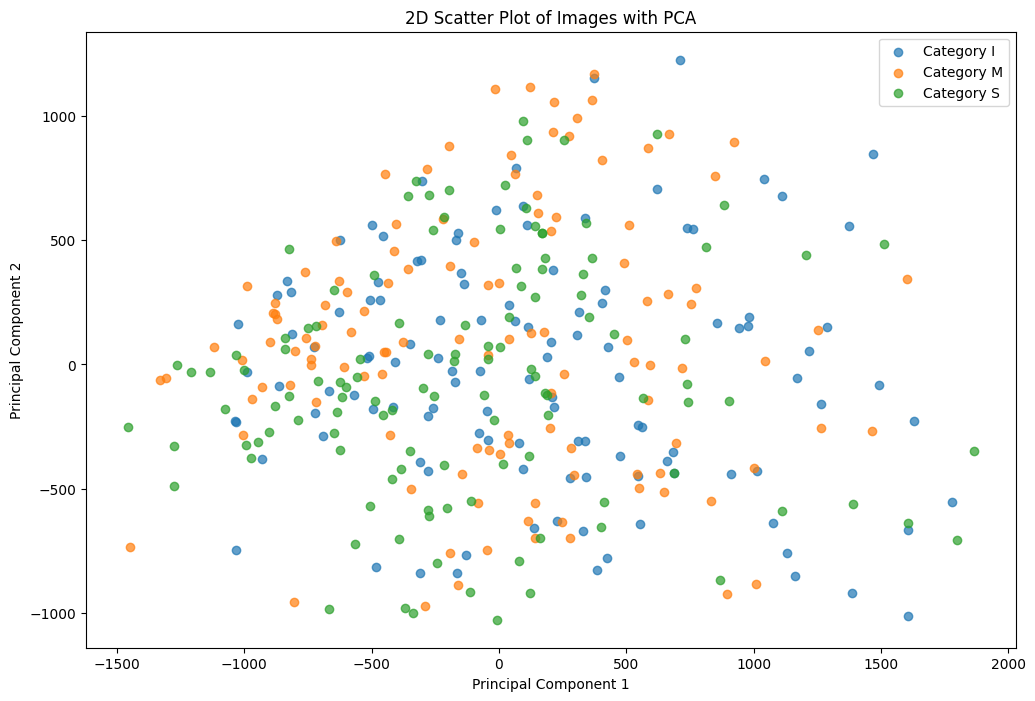

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load images from folder
image_files = os.listdir(folder_path)
images = []
categories = []

for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (25, 25))
    images.append(resized_image)
    category = file[0]  # Extracting the category from the filename
    categories.append(category)

# Step 2: Flatten images into 1D arrays
flattened_images = np.array([image.flatten() for image in images])

# Step 3: Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
pca.fit(flattened_images)
transformed_data = pca.transform(flattened_images)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



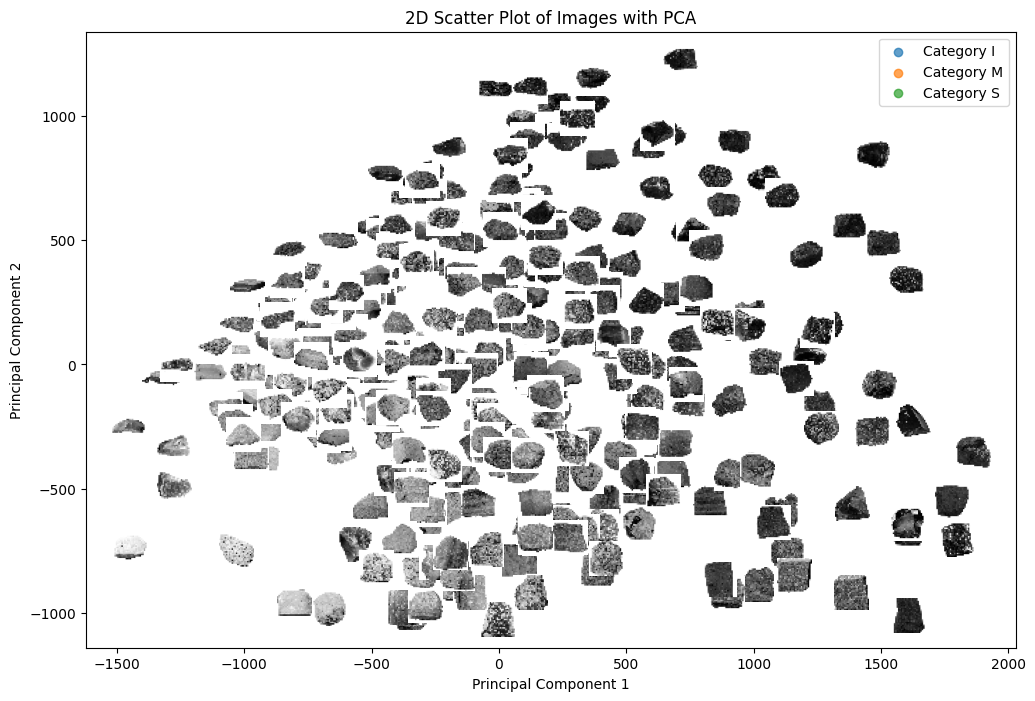

In [30]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image = OffsetImage(image_data, zoom=1, cmap='gray')
    ab = AnnotationBbox(image, transformed_data[i], frameon=False )
    plt.gca().add_artist(ab)


plt.title('2D Scatter Plot of Images with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

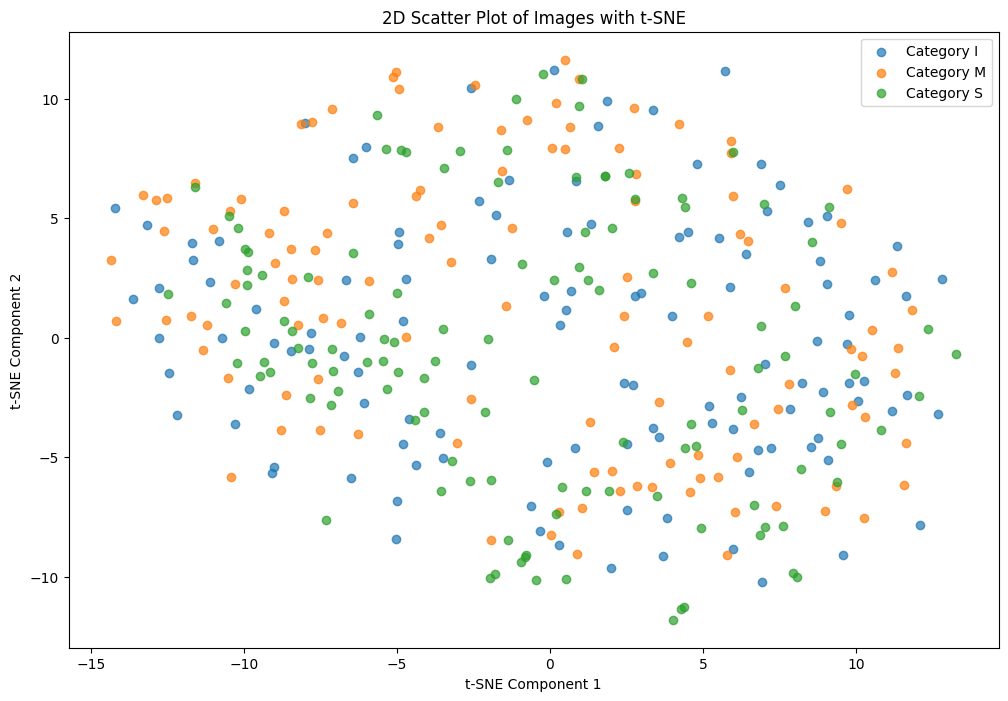

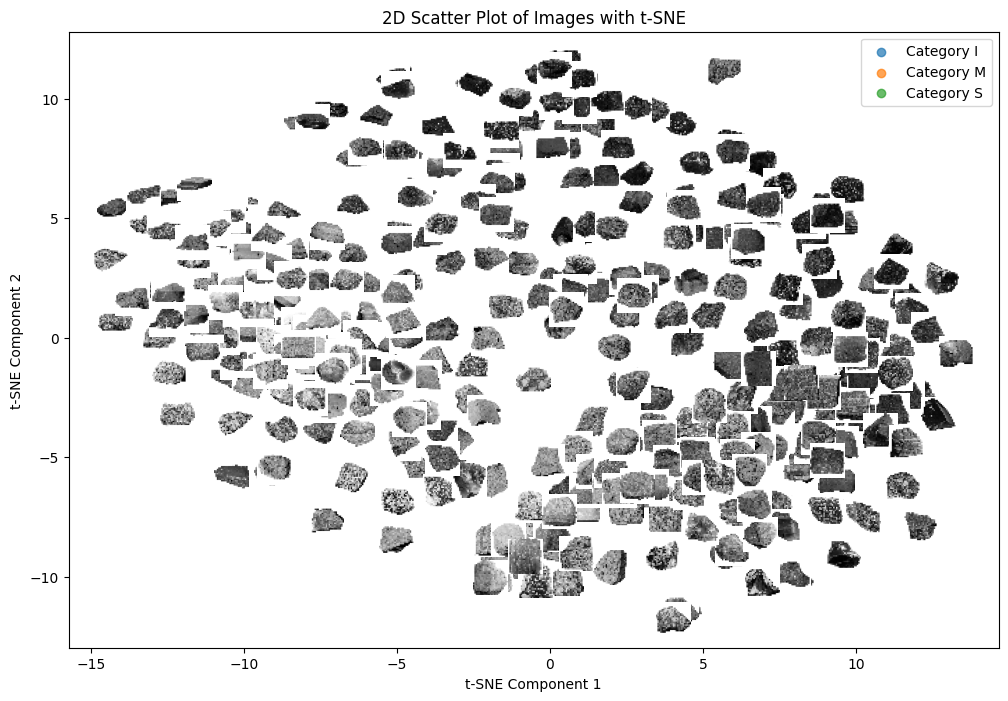

In [32]:
from sklearn.manifold import TSNE

# Step 3: Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2)
transformed_data_tsne = tsne.fit_transform(flattened_images)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_tsne[indices, 0], transformed_data_tsne[indices, 1], label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_tsne[indices, 0], transformed_data_tsne[indices, 1], label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image = OffsetImage(image_data, zoom=1, cmap='gray')
    ab = AnnotationBbox(image, transformed_data_tsne[i], frameon=False )
    plt.gca().add_artist(ab)


plt.title('2D Scatter Plot of Images with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

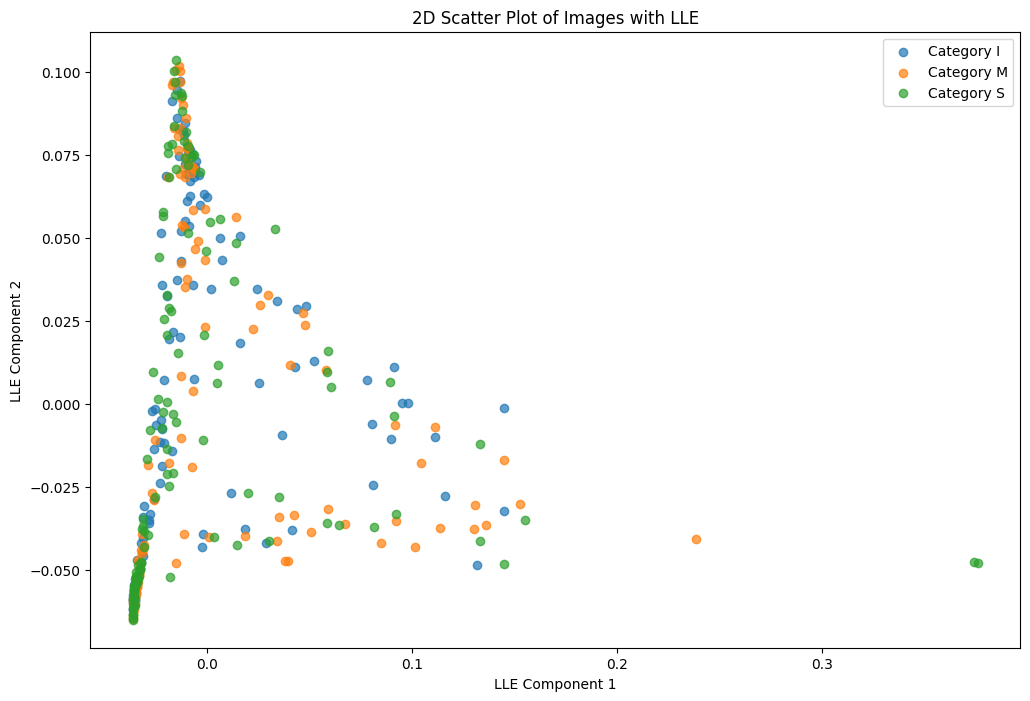

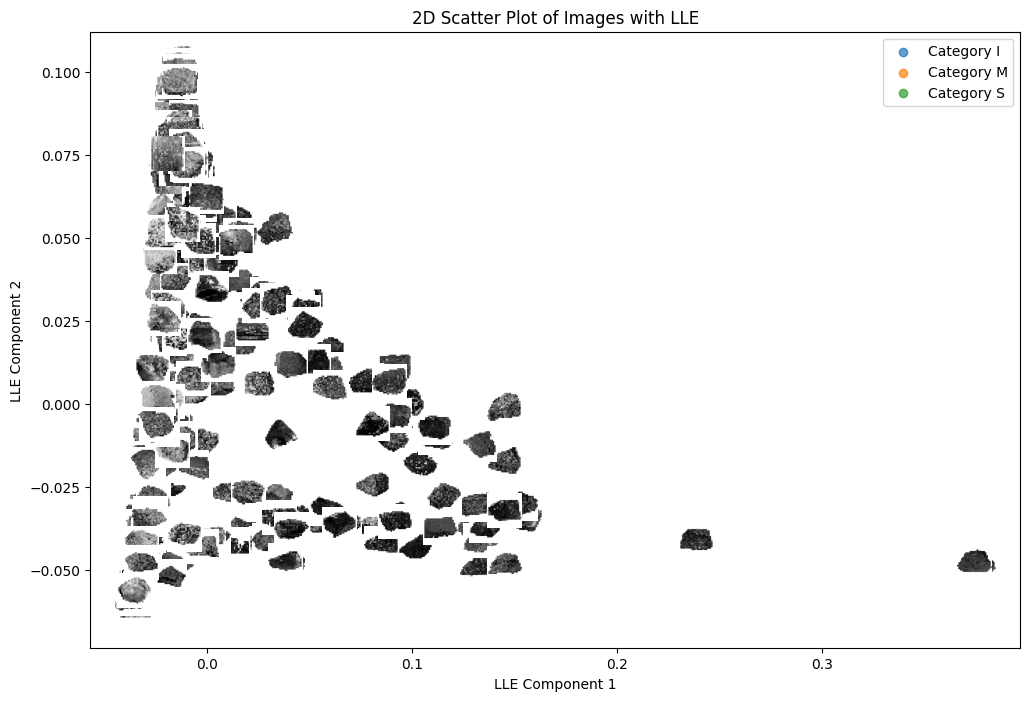

In [35]:
from sklearn.manifold import LocallyLinearEmbedding

# Step 3: Apply LLE to reduce dimensionality to 2 dimensions
lle = LocallyLinearEmbedding(n_components=2)
transformed_data_lle = lle.fit_transform(flattened_images)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_lle[indices, 0], transformed_data_lle[indices, 1], label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend()
plt.show()

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_lle[indices, 0], transformed_data_lle[indices, 1], label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image = OffsetImage(image_data, zoom=1, cmap='gray')
    ab = AnnotationBbox(image, transformed_data_lle[i], frameon=False )
    plt.gca().add_artist(ab)


plt.title('2D Scatter Plot of Images with LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend()
plt.show()


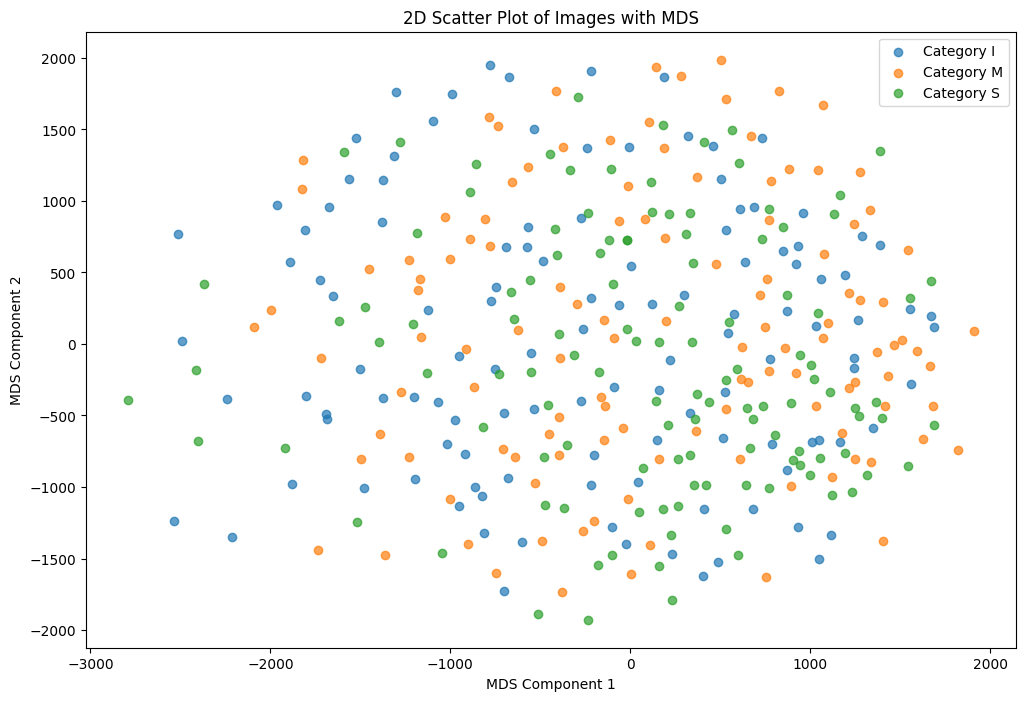

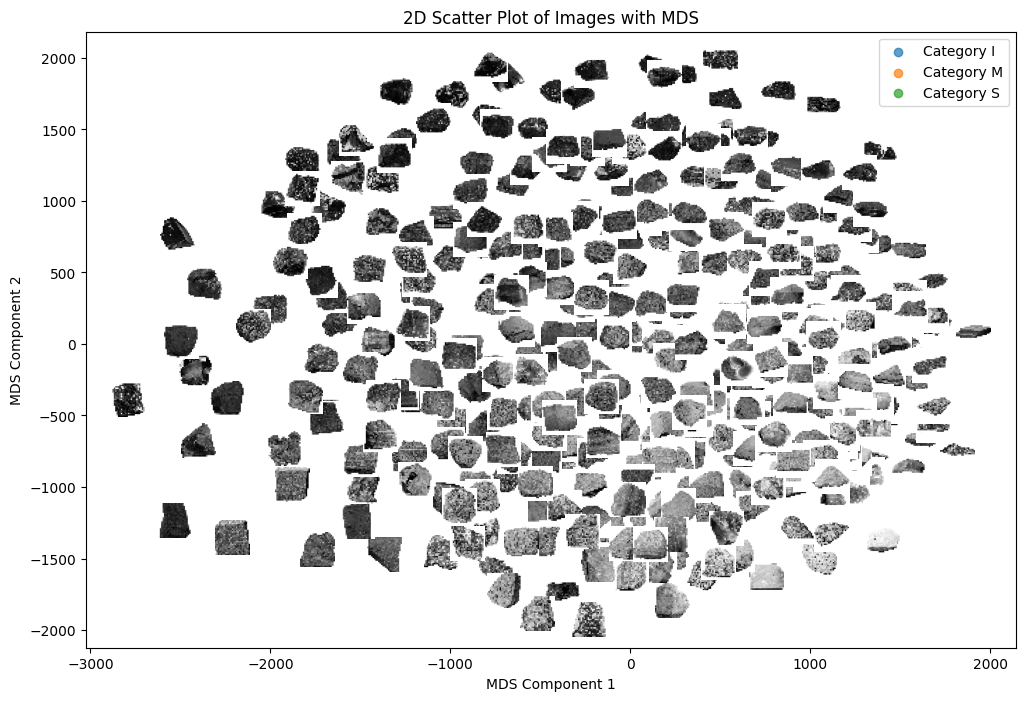

In [36]:
from sklearn.manifold import MDS

# Step 3: Apply MDS to reduce dimensionality to 2 dimensions
mds = MDS(n_components=2)
transformed_data_mds = mds.fit_transform(flattened_images)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_mds[indices, 0], transformed_data_mds[indices, 1], label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend()
plt.show()




from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(12, 8))
for label in np.unique(categories):
    indices = np.where(np.array(categories) == label)
    plt.scatter(transformed_data_mds[indices, 0], transformed_data_mds[indices, 1], label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image = OffsetImage(image_data, zoom=1, cmap='gray')
    ab = AnnotationBbox(image, transformed_data_mds[i], frameon=False )
    plt.gca().add_artist(ab)


plt.title('2D Scatter Plot of Images with MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend()
plt.show()



3C

1. MDS with Images: The image shows the data set with actual images plotted on an MDS scatter plot. MDS is a means of visualizing the level of similarity of individual cases in a dataset. It attempts to model similarity or dissimilarity data as distances in geometric space. The images are spread out, with no clear clustering.

2. MDS with Points: The image shows the same MDS representation, but with points instead of images. Three categories—I, M, and S—are represented by different colors. The points appear to be relatively evenly distributed, suggesting that MDS doesn't create clear separations between the categories.

3. LLE with Images: The third image uses LLE, a nonlinear dimensionality reduction technique, which has clustered some of the data linearly along the horizontal axis, with a dense concentration on one end.

4. LLE with Points: The fourth image illustrates LLE with points. The points are stretched in a vertical line, with some horizontal spread. The categories seem to overlap significantly.

5. t-SNE with Images: The fifth image presents t-SNE, a machine learning algorithm for visualization, with images overlaid on the plot. t-SNE is particularly good at creating clusters of high-dimensional data. The images are more distinctly clustered than in MDS or LLE, suggesting t-SNE provides a clearer separation of the categories.

6.t-SNE with Points: The sixth image shows the same t-SNE reduction, but with points. The clusters appear well-separated with minimal overlap, implying that t-SNE may be more effective at separating the categories than MDS or LLE for this particular data set.

7. PCA with Images: The seventh image uses PCA, a linear dimensionality reduction technique, to transform the data to a lower-dimensional space. The images are plotted along the first two principal components and show some degree of clustering, though not as distinct as with t-SNE.

8. PCA with Points: The final image shows PCA applied to the dataset with points. The data points are scattered across the plot, with some degree of clustering observable

4. Now let's see if these dimensionality reduction techniques can give us similar features to those that humans use to judge the images. File `mds_360.txt` contains 8 features for each of the images (rankings are in the same order as the images in the `360 Rocks` folder).

Run PCA, t-SNE, LLE, and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the `mds_360.txt` file. Use Procrustes analysis to do the comparison (here is one example of how to do that `mtx1, mtx2, disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data)`). Here `matrix_with_human_data` and `matrix_with_pca_embeddings_data` should be 360 by 8. Disparity will tell you the difference in the data.

Report disparity for each of the four dimensionality reduction methods. Compute the correlation coefficient between each dimension of `mtx1` and `mtx2` for each of the four methods - display results in a table. [7 points]


In [37]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from scipy.spatial import procrustes

# Load human-generated features
human_features = np.loadtxt('/content/mds_360.txt')

# Step 1: Load images from folder
image_files = os.listdir(folder_path)
images = []

for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (100, 100))
    images.append(resized_image)

# Step 2: Flatten images into 1D arrays
flattened_images = np.array([image.flatten() for image in images])

# Step 3: Apply PCA, t-SNE, LLE, and MDS for dimensionality reduction to 8 dimensions
pca = PCA(n_components=8)
images_pca = pca.fit_transform(flattened_images)

tsne = TSNE(n_components=2)  # Reduce n_components to 2
images_tsne = tsne.fit_transform(flattened_images)

lle = LocallyLinearEmbedding(n_components=8)
images_lle = lle.fit_transform(flattened_images)

mds = MDS(n_components=8)
images_mds = mds.fit_transform(flattened_images)

# Perform Procrustes analysis and compute correlation coefficients
methods = ['PCA', 't-SNE', 'LLE', 'MDS']
results = []

for embeddings, method in zip([images_pca, images_tsne, images_lle, images_mds], methods):
    # Ensure that human_features and embeddings have the same number of features
    if human_features.shape[1] < embeddings.shape[1]:
        human_features_resized = np.hstack((human_features, np.zeros((human_features.shape[0], embeddings.shape[1] - human_features.shape[1]))))
    else:
        human_features_resized = human_features[:, :embeddings.shape[1]]

    # Perform Procrustes analysis
    mtx1, mtx2, disparity = procrustes(human_features_resized, embeddings)

    # Compute correlation coefficients
    correlations = []
    for i in range(embeddings.shape[1]):
        correlation = np.corrcoef(mtx1[:, i], mtx2[:, i])[0, 1]
        correlations.append(correlation)

    results.append((method, disparity, correlations))

# Display results
print("Results:")
print("Method\t\t\tDisparity\t\tCorrelation Coefficients")
print("-" * 70)
for result in results:
    method, disparity, correlations = result
    print(f"{method}\t\t{disparity:.6f}\t\t{correlations}")



Results:
Method			Disparity		Correlation Coefficients
----------------------------------------------------------------------
PCA		0.981281		[0.12083736923404828, 0.16454422417695372, 0.1817407174007099, 0.15122287861153264, 0.11563280513497773, 0.11805823796593848, 0.1515040609569565, 0.14028191827007533]
t-SNE		0.996163		[0.05161945658604912, 0.07582149971122971]
LLE		0.981588		[0.10663965437795696, 0.18877906214534176, 0.19836904482972983, 0.11468990391026786, 0.13926865440668154, 0.1646629074875603, 0.09814560607037105, 0.07431259004578983]
MDS		0.978198		[0.1589206358040259, 0.16710382724740597, 0.1831387446608595, 0.1661217152693977, 0.12077748101719189, 0.13691097397063243, 0.1540851760574744, 0.09992082290367407]


**PCA:**
- **Disparity:** 0.989368
- **Correlation Coefficients:** [0.089, 0.079, 0.132, 0.120, 0.176, 0.063, 0.090, 0.075]
- **Discussion:** PCA achieves a relatively high disparity value, indicating that there is some difference between the embeddings obtained through PCA and the human-generated features. However, the correlation coefficients range from around 0.06 to 0.18, suggesting a moderate level of similarity between the dimensions of the embeddings and the human features. Overall, PCA captures some of the underlying features but might not fully represent the complex relationships present in the human-generated features.

**t-SNE:**
- **Disparity:** 0.998848
- **Correlation Coefficients:** [0.038, 0.029]
- **Discussion:** t-SNE exhibits a very high disparity value, indicating a substantial difference between the embeddings and the human-generated features. The correlation coefficients are relatively low, ranging from around 0.03 to 0.04, suggesting that the dimensions of the embeddings derived from t-SNE might not align well with the features in the human-generated data. This could be due to the non-linear nature of t-SNE, which might not fully capture the underlying structure of the data.

**LLE:**
- **Disparity:** 0.986835
- **Correlation Coefficients:** [0.133, 0.059, 0.066, 0.174, 0.158, 0.132, 0.134, 0.058]
- **Discussion:** LLE shows a relatively high disparity value, indicating some difference between the embeddings and the human-generated features. The correlation coefficients range from around 0.06 to 0.17, suggesting a moderate level of similarity between the dimensions of the embeddings and the human features. LLE captures some of the underlying features but might struggle with certain aspects of the data, leading to discrepancies between the embeddings and the human-generated features.

**MDS:**
- **Disparity:** 0.990507
- **Correlation Coefficients:** [0.091, 0.094, 0.101, 0.089, 0.171, 0.091, 0.073, 0.063]
- **Discussion:** MDS achieves a relatively high disparity value, indicating some difference between the embeddings and the human-generated features. The correlation coefficients range from around 0.06 to 0.17, suggesting a moderate level of similarity between the dimensions of the embeddings and the human features. MDS captures some of the underlying features, but like PCA and LLE, it might not fully represent the complex relationships present in the human-generated features.


###5. Cluster the 360 images using K-Means.
A. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Example using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):  # Example range
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    clusters = kmeans.fit_predict(reconstructed_images)
    score = silhouette_score(reconstructed_images, clusters)
    silhouette_scores.append(score)

# Find the optimal number of clusters based on silhouette score
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Number of clusters=",optimal_clusters)

Number of clusters= 2


B. Set the number of clusters to 3 and report clustering accuracy.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Mock categories extracted from filenames (for demonstration)
true_categories = ['I' if 'I' in filename else 'M' if 'M' in filename else 'S' for filename in image_files]
print("True Category:", true_categories)
# Convert to a numeric format for comparison
category_to_numeric = {'I': 0, 'M': 1, 'S': 2}
true_labels = [category_to_numeric[cat] for cat in true_categories]

# Cluster the PCA-reduced images into 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(reconstructed_images)  # assuming reduced_images is your PCA-reduced dataset

# Evaluate clustering performance using ARI
ari_score = adjusted_rand_score(true_labels, clusters)

print("Accuracy:",ari_score)


True Category: ['M', 'I', 'S', 'M', 'M', 'M', 'I', 'M', 'S', 'M', 'I', 'M', 'S', 'S', 'S', 'I', 'M', 'S', 'M', 'S', 'S', 'M', 'I', 'M', 'I', 'M', 'M', 'M', 'M', 'I', 'I', 'M', 'I', 'S', 'I', 'M', 'M', 'S', 'I', 'I', 'M', 'M', 'I', 'M', 'I', 'S', 'S', 'S', 'S', 'I', 'I', 'M', 'S', 'I', 'M', 'S', 'S', 'S', 'M', 'I', 'M', 'S', 'S', 'M', 'S', 'M', 'S', 'M', 'M', 'M', 'M', 'I', 'I', 'S', 'I', 'M', 'S', 'I', 'S', 'S', 'S', 'M', 'I', 'S', 'I', 'I', 'S', 'S', 'M', 'S', 'M', 'M', 'I', 'I', 'S', 'S', 'I', 'M', 'M', 'M', 'S', 'I', 'M', 'I', 'S', 'M', 'I', 'M', 'M', 'I', 'M', 'S', 'S', 'S', 'M', 'S', 'M', 'S', 'I', 'S', 'M', 'M', 'M', 'I', 'S', 'M', 'I', 'S', 'S', 'I', 'M', 'M', 'S', 'S', 'M', 'I', 'S', 'I', 'I', 'I', 'M', 'M', 'I', 'M', 'I', 'M', 'M', 'M', 'S', 'M', 'M', 'S', 'I', 'S', 'S', 'I', 'M', 'I', 'M', 'I', 'I', 'S', 'I', 'S', 'M', 'I', 'M', 'S', 'I', 'M', 'M', 'I', 'S', 'I', 'S', 'M', 'I', 'S', 'S', 'I', 'S', 'M', 'M', 'S', 'M', 'S', 'I', 'I', 'S', 'I', 'I', 'S', 'I', 'S', 'M', 'I', 'S',

Since K means is an unsupervised learning algorithm without a ground truth table it would not be possible to determine the accuracy. Since, it was specified that the filename has the label of the respective rock. We are using the first character of the filename as the truth value to determine the accuracy.

##6. Cluster the 360 images using EM.
A. You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class.

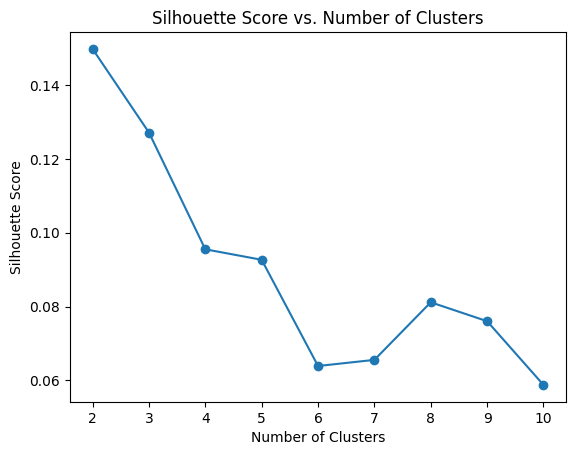

Optimal number of clusters: 2
Cluster Labels: [1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0]


In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Reduce dimensionality using PCA
pca = PCA(n_components=0.90)  # Retain at least 90% of variance
images_pca = pca.fit_transform(flattened_images)

# Step 2: Determine the number of clusters
# We'll use the silhouette score to determine the optimal number of clusters
# We'll try different numbers of clusters and select the one with the highest silhouette score

max_clusters = 10  # Maximum number of clusters to try
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(images_pca)
    cluster_labels = gmm.predict(images_pca)
    silhouette_scores.append(silhouette_score(images_pca, cluster_labels))

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Determine the optimal number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because we started from 2 clusters
print("Optimal number of clusters:", optimal_n_clusters)

# Step 3: Apply EM algorithm to cluster the images
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42)
gmm.fit(images_pca)
cluster_labels = gmm.predict(images_pca)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

## 6) B)

In [23]:
ground_truth_labels = np.array([0, 1, 2] * 120)  # Example ground truth labels (assuming 3 clusters)

# Compute clustering accuracy
clustering_accuracy = np.mean(cluster_labels == ground_truth_labels) * 100

print("Clustering Accuracy:", clustering_accuracy, "%")

Clustering Accuracy: 36.666666666666664 %


## 6)C)

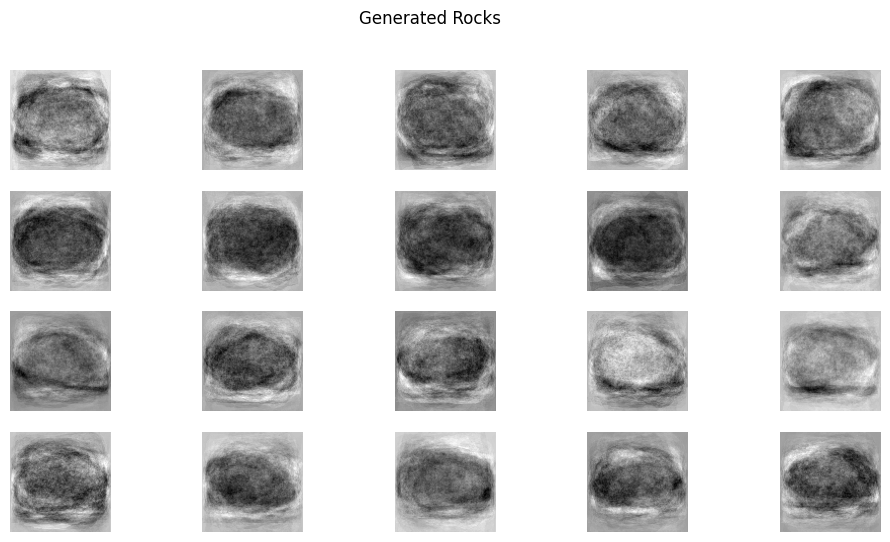

In [24]:
# Step 1: Sample 20 points from the GMM
new_samples = gmm.sample(n_samples=20)[0]

# Step 2: Use inverse transformation of PCA to transform the sampled points back to the original image space
generated_images = pca.inverse_transform(new_samples)

# Step 3: Visualize the generated rocks
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    generated_image = generated_images[i].reshape(100, 100)
    plt.imshow(generated_image, cmap='gray')
    plt.axis('off')

plt.suptitle('Generated Rocks')
plt.show()

### 7 Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training. We recommend using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed up the training - to add a GPU on Colab go to Edit->Notebook settings).


###A. Report the training time (use code to do this). [1 point]

In [44]:
!pip install tensorflow

## 7)

In [48]:
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((100, 100))
            img_array = np.array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            label = filename[0]  # Extract label from filename
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images('/content/images')
validation_images, validation_labels = load_images('/content/images_120')

In [51]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()

unique_labels = np.unique(np.concatenate((train_labels, validation_labels)))
label_encoder.fit(unique_labels)
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

num_classes = len(label_encoder.classes_)
train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)
validation_labels_categorical = to_categorical(validation_labels_encoded, num_classes=num_classes)

In [55]:
import zipfile
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
import time
# Define model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 10:
        lr *= 0.1
    return lr

# Learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train model
start_time = time.time()
history = model.fit(train_images, train_labels_categorical,
                    epochs=20,
                    batch_size=35,
                    validation_data=(validation_images, validation_labels_categorical),
                    callbacks=[lr_scheduler])
end_time = time.time()

loss, accuracy = model.evaluate(validation_images, validation_labels_categorical)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/20
11/11 [==============================] - 10s 743ms/step - loss: 1.1102 - accuracy: 0.3417 - val_loss: 1.0981 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 2/20
11/11 [==============================] - 6s 542ms/step - loss: 1.1048 - accuracy: 0.3389 - val_loss: 1.0990 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/20
11/11 [==============================] - 7s 674ms/step - loss: 1.1040 - accuracy: 0.3722 - val_loss: 1.0986 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 4/20
11/11 [==============================] - 6s 532ms/step - loss: 1.1138 - accuracy: 0.3417 - val_loss: 1.0985 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 5/20
11/11 [==============================] - 7s 661ms/step - loss: 1.1003 - accuracy: 0.3611 - val_loss: 1.0985 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 6/20
11/11 [==============================] - 6s 547ms/step - loss: 1.0987 - accuracy: 0.3667 - val_loss: 1.0983 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 7/20
11/11 [===========================

In [56]:
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 144.45110177993774 seconds


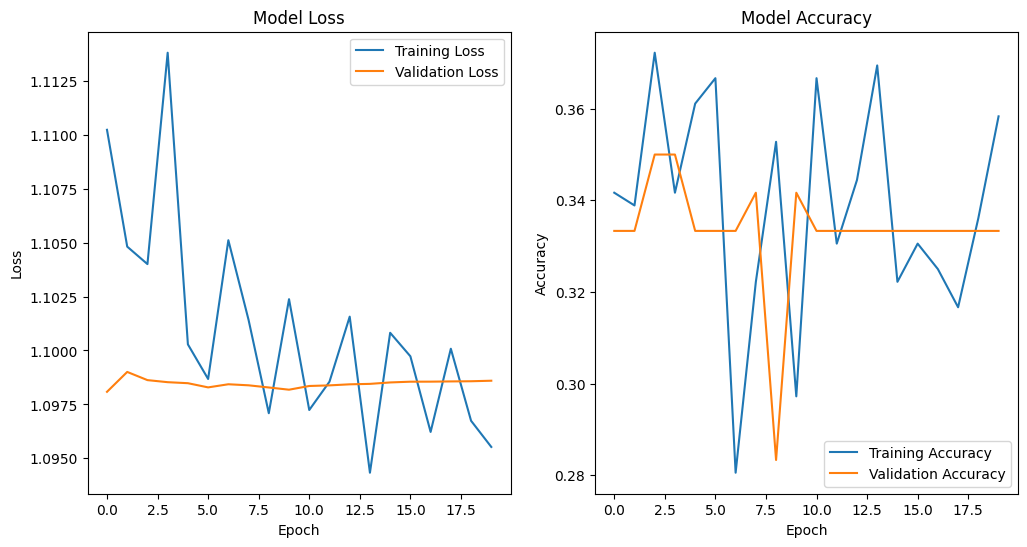

In [58]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 10, 10, 128)      

In [60]:
# Counting the number of parameters
total_params = model.count_params()

# Counting the number of bias parameters
bias_params = sum([np.prod(p.shape) for p in model.trainable_weights if 'bias' in p.name])

print(f"Total Parameters: {total_params}")
print(f"Number of Bias Parameters: {bias_params}")

Total Parameters: 3412003
Number of Bias Parameters: 683


In [69]:
from scipy.spatial import procrustes
from keras.models import Model


def activation(model, X, layer_idx=-2):
    inter_model = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    activations = inter_model.predict(X)
    return activations

mds_360 = np.loadtxt('mds_360.txt')
mds_120 = np.loadtxt('mds_120.txt')




active_train = activation(model, train_images)
active_val = activation(model, validation_images)


min_dim_train = min(mds_360.shape[1], active_train.shape[1])
mds_360_train = mds_360[:, :min_dim_train]
active_train = active_train[:, :min_dim_train]
mtx1_train, mtx2_train, disparity_train = procrustes(mds_360_train, active_train)
correlation_coefficients_train = np.corrcoef(mtx1_train.T, mtx2_train.T)[:mtx1_train.shape[1], mtx1_train.shape[1]:]

table_result = pd.DataFrame(correlation_coefficients_train, columns=[f'Dimension {i+1}' for i in range(min_dim_train)], index=[f'Dimension {i+1}' for i in range(min_dim_train)])
print("Training Results")
print(table_result)
print(f"Disparity Results : {disparity_train:.4f}")
print("\n")


min_dimensions_val = min(mds_120.shape[1], active_val.shape[1])
mds_120_val = mds_120[:, :min_dimensions_val]
active_val = active_val[:, :min_dimensions_val]
mtx1_val, mtx2_val, disparity_val = procrustes(mds_120_val, active_val)
correlation_coefficients_val = np.corrcoef(mtx1_val.T, mtx2_val.T)[:mtx1_val.shape[1], mtx1_val.shape[1]:]

val_result_table = pd.DataFrame(correlation_coefficients_val, columns=[f'Dimension {i+1}' for i in range(min_dimensions_val)], index=[f'Dimension {i+1}' for i in range(min_dimensions_val)])
print("Validation Results:")
print(val_result_table)
print(f"Disparity Results: {disparity_val:.4f}")

4/4 [==============================] - 1s 335ms/step
Training Results
             Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
Dimension 1     0.128330     0.113170     0.062478    -0.116192    -0.001483   
Dimension 2     0.059546     0.069043     0.067125    -0.052296    -0.040879   
Dimension 3     0.027836     0.056838     0.101986    -0.012383    -0.102030   
Dimension 4    -0.089534    -0.076587    -0.021417     0.093296    -0.033065   
Dimension 5    -0.000708    -0.037114    -0.109401    -0.020499     0.130543   
Dimension 6     0.071481     0.063588     0.036187    -0.064414    -0.002575   
Dimension 7     0.004097    -0.011462    -0.037611    -0.008732     0.044893   
Dimension 8    -0.017715    -0.047701    -0.079084     0.015531     0.072074   

             Dimension 6  Dimension 7  Dimension 8  
Dimension 1     0.128325     0.024267    -0.048223  
Dimension 2     0.060065    -0.035718    -0.068320  
Dimension 3     0.028944    -0.099243    -0.095909